<a href="https://colab.research.google.com/github/ShraddhaAtreya/100-days-of-Python/blob/main/aci_unit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#If you need more libraries, add them here.


In [ ]:
# prompt: read the dataset  /content/diabetes.csv

import pandas as pd
df = pd.read_csv('/content/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   

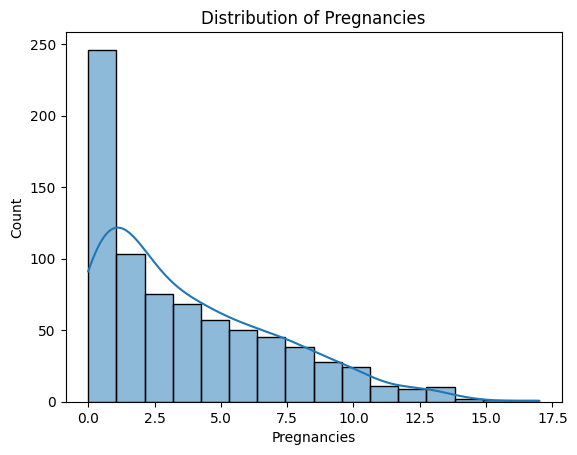

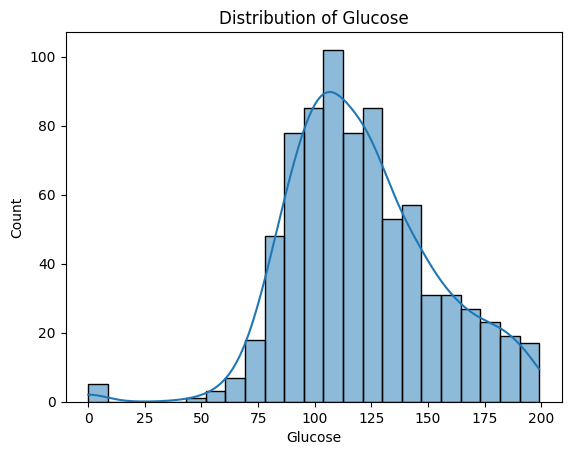

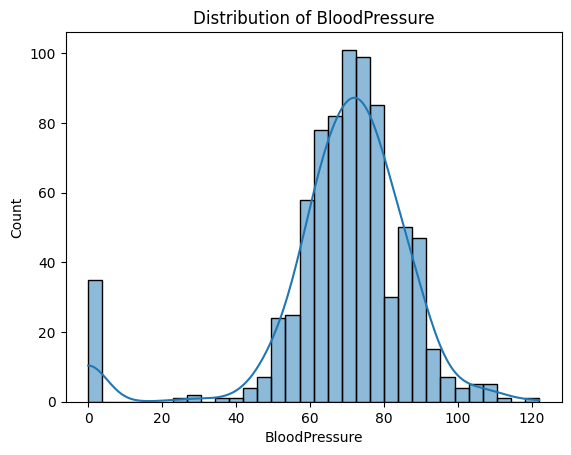

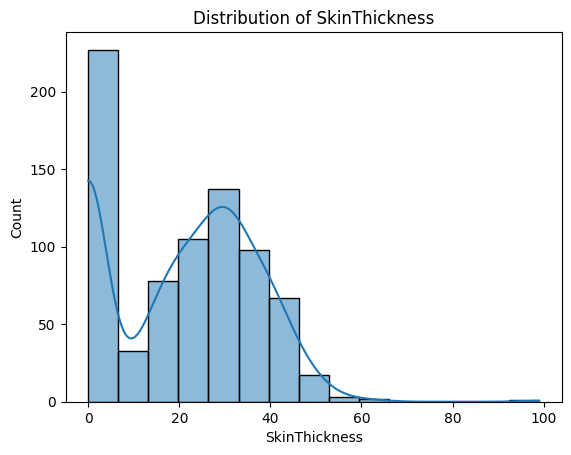

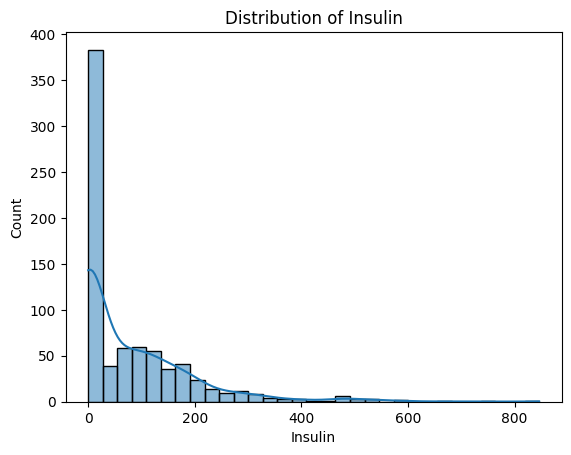

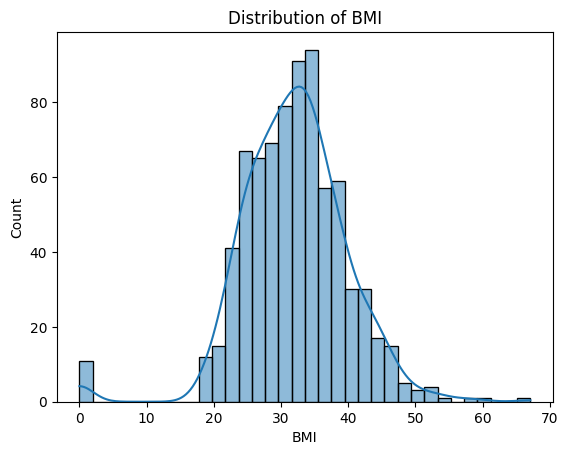

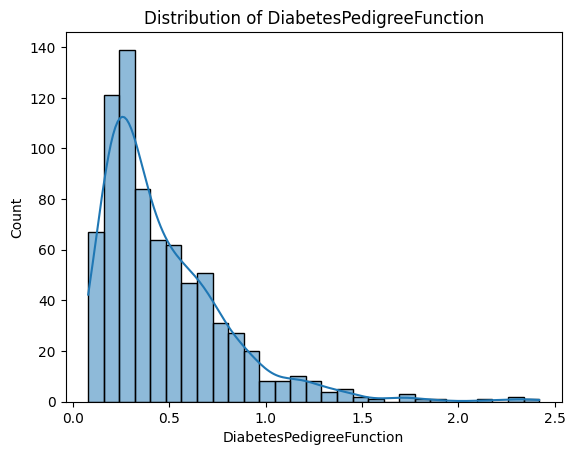

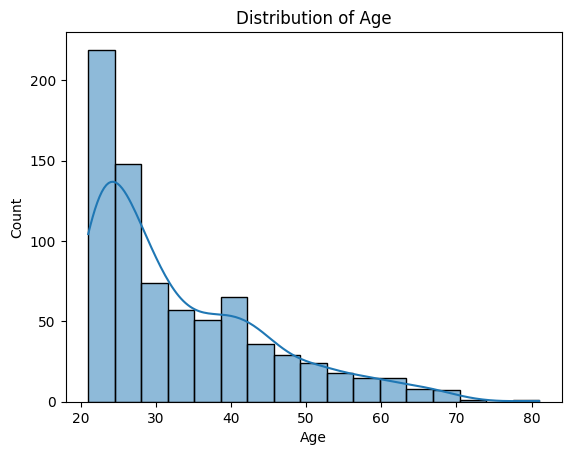

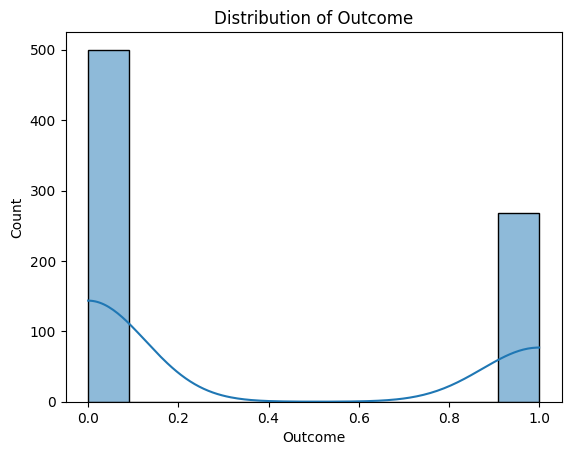

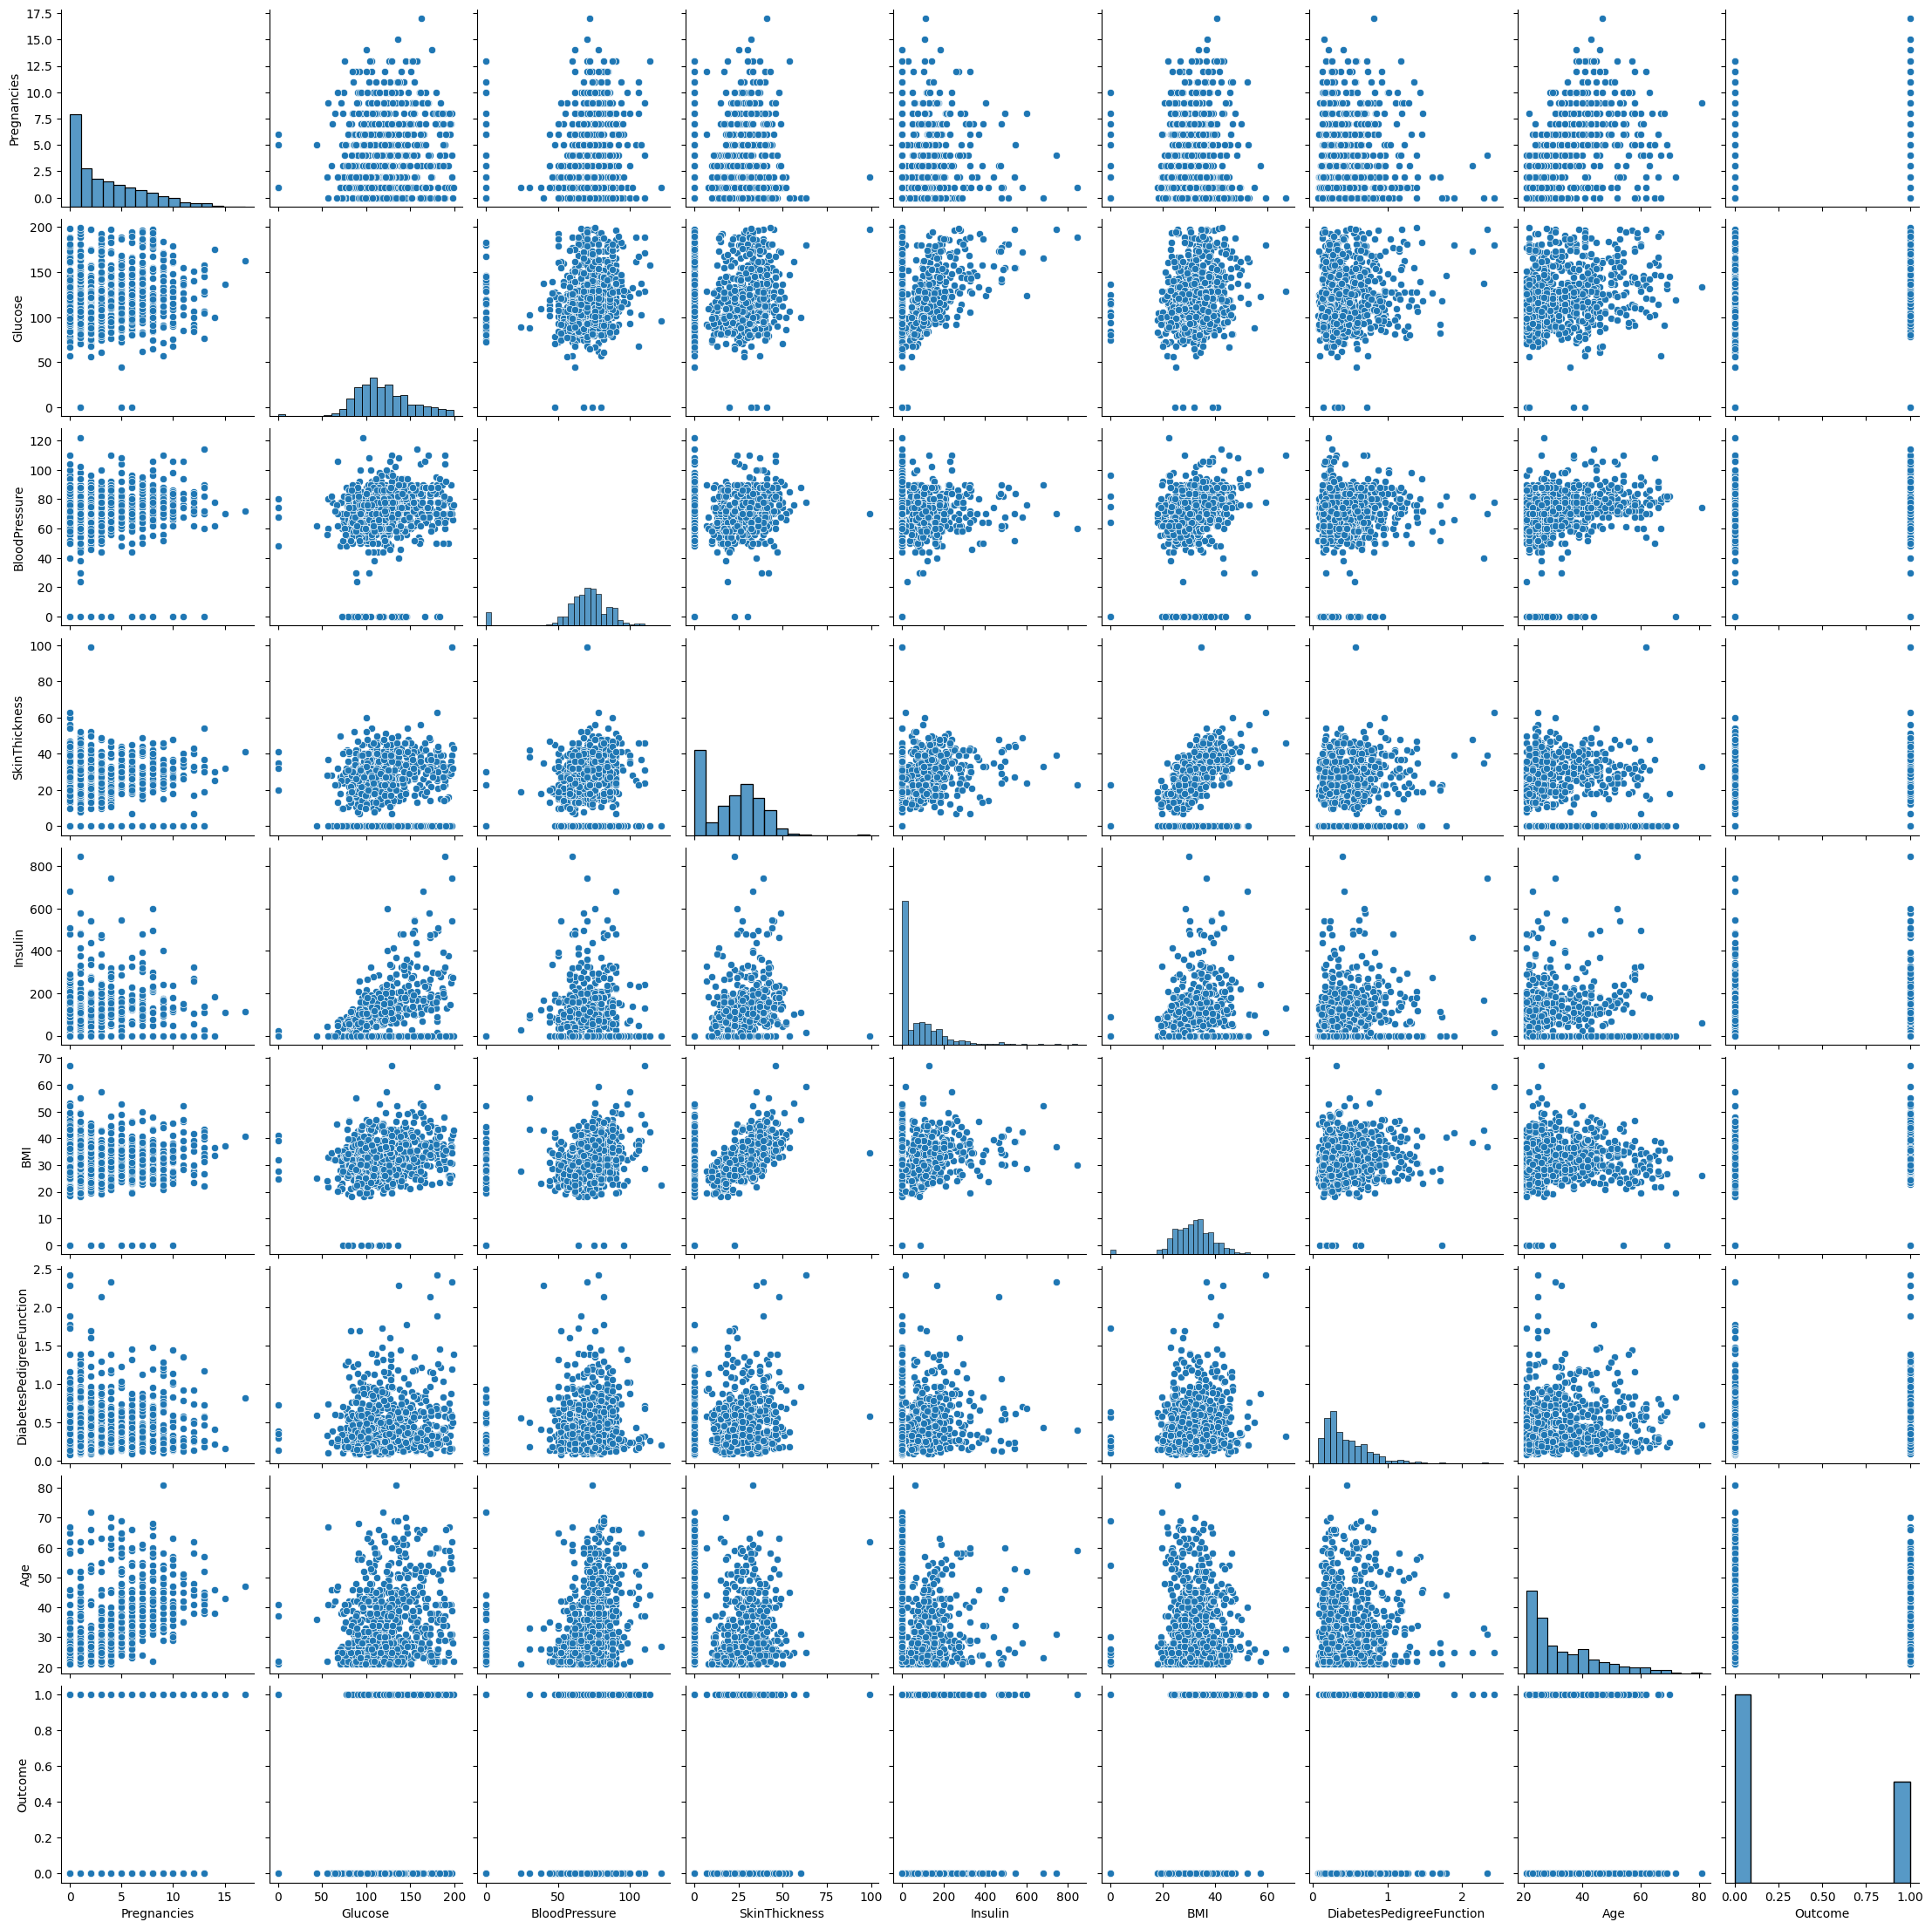

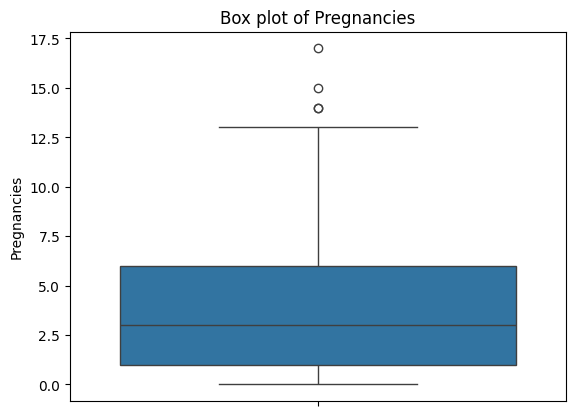

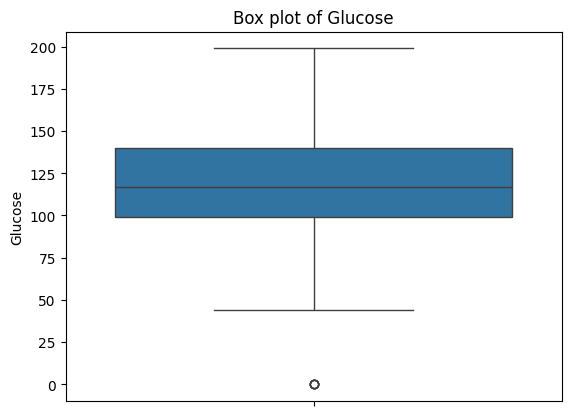

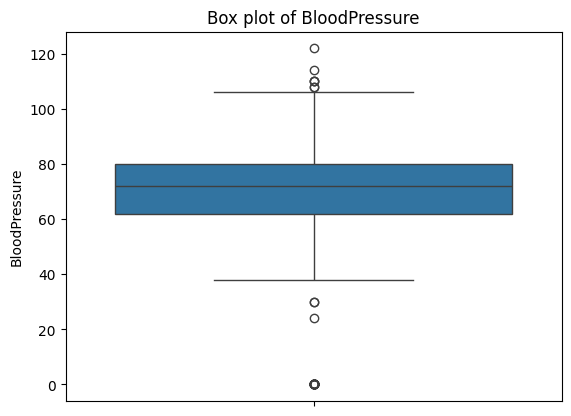

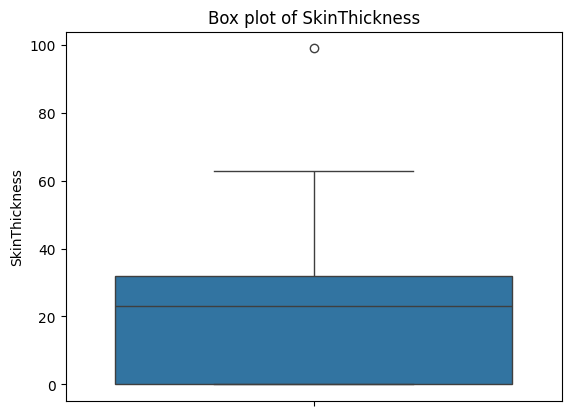

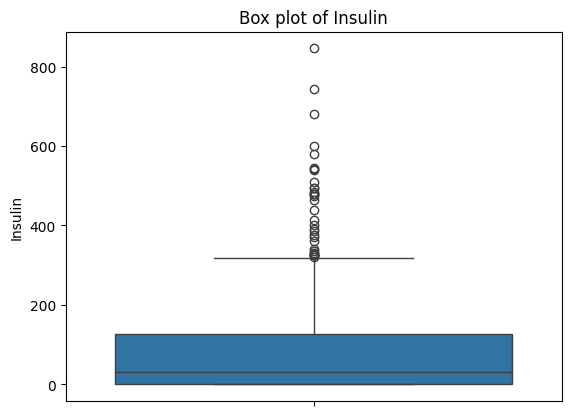

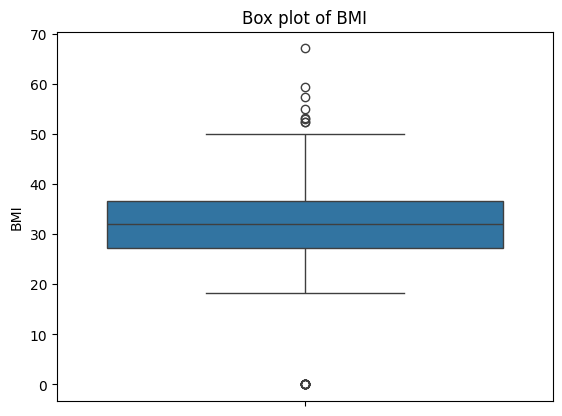

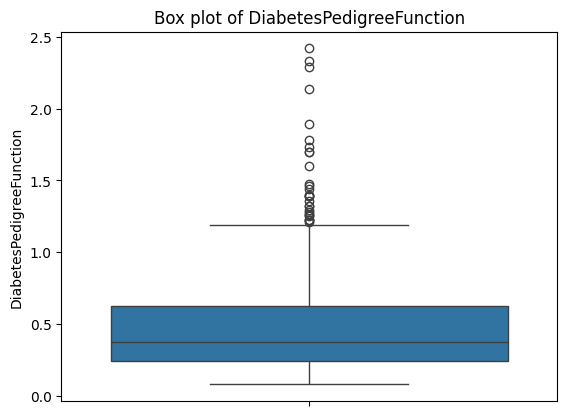

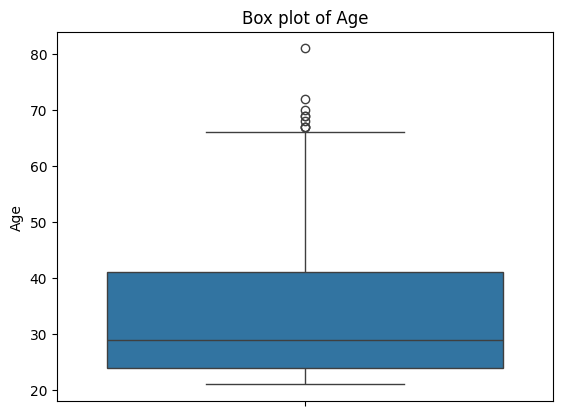

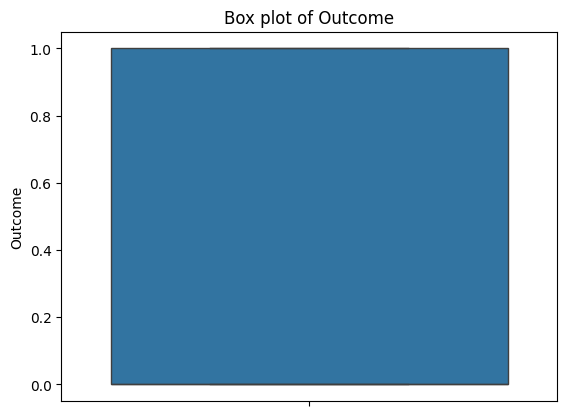

Number of duplicates: 0
Number of duplicates after removing: 0


In [ ]:
# prompt: complete the necessary exploration and snitization of data

import matplotlib.pyplot as plt
import numpy as np
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Summary statistics
print(df.describe())

# Explore distributions of numerical features
for col in df.select_dtypes(include=np.number):
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Explore relationships between numerical features
sns.pairplot(df)
plt.show()

# Explore relationships between numerical and categorical features (if any)
# Example (assuming 'Outcome' is a categorical feature):
# sns.boxplot(x='Outcome', y='Glucose', data=df)
# plt.show()

# Check for outliers in numerical features using box plots
for col in df.select_dtypes(include=np.number):
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# Handle missing values (if any)
# Example: Imputation with mean
# for col in df.select_dtypes(include=np.number):
#     if df[col].isnull().any():
#         df[col] = df[col].fillna(df[col].mean())

# Handle outliers (if any)
# Example: Capping outliers
# for col in df.select_dtypes(include=np.number):
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     upper_bound = q3 + 1.5 * iqr
#     lower_bound = q1 - 1.5 * iqr
#     df[col] = np.clip(df[col], lower_bound, upper_bound)

# Convert data types if necessary
# Example: Convert a numerical column to categorical
# df['Outcome'] = df['Outcome'].astype('category')

# Check for duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()
print(f"Number of duplicates after removing: {df.duplicated().sum()}")


In [ ]:
# prompt: build a linear regression model to predict the predictor variables

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # Features are all columns except 'Outcome'
y = df['Outcome']  # Target variable is 'Outcome'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can further analyze the model's coefficients and intercepts
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.17104527280850104
R-squared: 0.25500281176741757
Coefficients: [ 0.01046818  0.00563353 -0.00228103  0.00053209 -0.00027815  0.01503864
  0.11126264  0.00646027]
Intercept: -0.9487546338208503


In [ ]:
# prompt: check the innovative methods to improve the accurcy of the dataset

import pandas as pd
# ... (Your existing code)

# Feature Engineering: Create new features from existing ones
# Example: BMI categories
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df = pd.get_dummies(df, columns=['BMI_Category'], drop_first=True) #One-hot encode

# Example: Interaction terms
df['Glucose_Insulin'] = df['Glucose'] * df['Insulin']

# Example: Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) #Try different degrees
X_poly = poly.fit_transform(X)


# ... (rest of your code, modifying X as needed)

#Try different models
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #Tune n_estimators
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")


#Hyperparameter Tuning (example with Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy') #scoring can be changed
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

best_rf_pred = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print(f'Best Random Forest Accuracy: {best_rf_accuracy}')
print(f'Best parameters: {grid_search.best_params_}')

#Further analysis - feature importances
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, feature_importances):
  print(name, importance)



Random Forest Accuracy: 0.7207792207792207
Best Random Forest Accuracy: 0.7337662337662337
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Pregnancies 0.07410886510584402
Glucose 0.27117186502092294
BloodPressure 0.0820014352481533
SkinThickness 0.062652273156481
Insulin 0.07604340978489965
BMI 0.17497426290357265
DiabetesPedigreeFunction 0.11197252286616727
Age 0.14707536591395928


**AUTO MOBILE DATASET**

In [ ]:
# prompt: IMPORT THE NECESSARY MODULE ahain

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [ ]:
# prompt: read the dataset /content/Automobile_data.csv

import pandas as pd
df_automobile = pd.read_csv('/content/Automobile_data.csv')
df_automobile.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
# prompt: complete the necessary sanitization of the data

import numpy as np
# ... (Your existing code)

# Handle missing values (if any) - More robust handling
for col in df.select_dtypes(include=np.number):
    if df[col].isnull().any():
        # Impute with median (more robust to outliers than mean)
        df[col] = df[col].fillna(df[col].median())
    # Additional check for impossible values (e.g., negative glucose)
    if col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
        df[col] = df[col].replace(0, np.nan)  # Replace zeros with NaN
        df[col] = df[col].fillna(df[col].median()) #Impute with median again


# Handle outliers (more sophisticated method: IQR with winsorization)
def winsorize_outliers(series, lower_bound=0.05, upper_bound=0.95):
    lower_threshold = series.quantile(lower_bound)
    upper_threshold = series.quantile(upper_bound)
    winsorized_series = np.clip(series, lower_threshold, upper_threshold)
    return winsorized_series

for col in df.select_dtypes(include=np.number):
    df[col] = winsorize_outliers(df[col])


# ... (rest of your code)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the automobile dataset
df_automobile = pd.read_csv('/content/Automobile_data.csv')

# Replace '?' with NaN for better handling
df_automobile.replace('?', np.nan, inplace=True)

# Convert numeric columns with missing values to float
for col in df_automobile.columns:
    if df_automobile[col].dtype == object:  # Check if column is object type
        try:
            df_automobile[col] = df_automobile[col].astype(float)
        except ValueError:
            pass

# Fill missing values in numeric columns with mean
for col in df_automobile.select_dtypes(include=np.number):
    if df_automobile[col].isnull().any():
        df_automobile[col].fillna(df_automobile[col].mean(), inplace=True)

# One-hot encoding for categorical features
df_automobile = pd.get_dummies(df_automobile,
                               columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                                        'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
                                        'fuel-system'],
                               drop_first=True)

# Check if 'price' is numeric
df_automobile['price'] = pd.to_numeric(df_automobile['price'], errors='coerce')
df_automobile.dropna(subset=['price'], inplace=True)

# Feature and target variable
X_auto = df_automobile.drop('price', axis=1)
y_auto = (df_automobile['price'] > df_automobile['price'].median()).astype(int)  # Convert price to binary for logistic regression

# Split data
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(X_auto, y_auto, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_auto, y_train_auto)

# Prediction
y_pred_auto = log_reg_model.predict(X_test_auto)

# Evaluation (Classification Metrics)
print(classification_report(y_test_auto, y_pred_auto))
print(confusion_matrix(y_test_auto, y_pred_auto))


<ipython-input-11-43ec9ffef434>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_automobile[col].fillna(df_automobile[col].mean(), inplace=True)


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.90      0.95      0.92        19

    accuracy                           0.93        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.93      0.93      0.93        41

[[20  2]
 [ 1 18]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy (Automobile Dataset): 0.926829268292683
symboling: 0.16138954410992198
normalized-losses: -0.0023732261816566446
wheel-base: 0.29666414093027765
length: -0.10222799730117758
width: -0.08538489386862731
height: -0.2648688297156127
curb-weight: 0.007565305776966341
engine-size: -0.029703137291124483
bore: -0.17612508976246496
stroke: -0.6622354973693115
compression-ratio: 0.19849185198761707
horsepower: 0.04284905640445985
peak-rpm: -0.0009094572313880493
city-mpg: 0.1899987550627114
highway-mpg: -0.32762020503476214
make_audi: 0.3562878629173853
make_bmw: 0.3835587804393862
make_chevrolet: -0.0019254138073336736
make_dodge: -0.35303830091924565
make_honda: -0.015534163905558446
make_isuzu: 0.5329762244381901
make_jaguar: 1.5698409851877894e-05
make_mazda: 0.7515209408849864
make_mercedes-benz: 0.00032468293871799794
make_mercury: 0.0014934322394865418
make_mitsubishi: -0.66839395613587
make_nissan: -0.02447696767157152
make_peugot: 0.013957643600578546
make_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.90243902 0.90243902 0.97560976 0.75609756 0.73170732]
Mean cross-validation accuracy: 0.8536585365853657


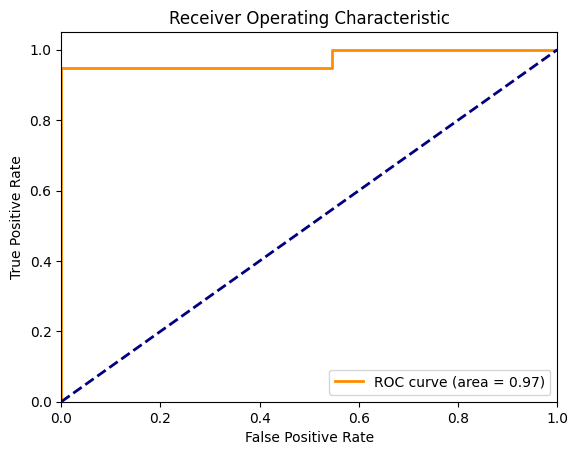

AUC: 0.9712918660287081


In [ ]:
# prompt: perform the model validation and measure the accuracy of the model

import numpy as np
# ... (Your existing code)

# Model Validation and Accuracy Measurement for Logistic Regression (Automobile Dataset)

# ... (Your existing code for data loading, preprocessing, and model training)


# Evaluate the model
accuracy_auto = accuracy_score(y_test_auto, y_pred_auto)
print(f"Logistic Regression Accuracy (Automobile Dataset): {accuracy_auto}")


#Further analysis - coefficients
coefficients = log_reg_model.coef_
feature_names_auto = X_auto.columns
for name, coef in zip(feature_names_auto, coefficients[0]):
    print(f"{name}: {coef}")

# Cross-validation (more robust accuracy estimation)
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg_model, X_auto, y_auto, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores)}")

# ROC Curve and AUC (Area Under the Curve)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_auto = log_reg_model.predict_proba(X_test_auto)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test_auto, y_prob_auto)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")


**PIMA INDIAS DATASET**

In [ ]:
# prompt: import the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#If you need more libraries, add them here.


In [ ]:
# prompt: read the dataset  /content/diabetes.csv

import pandas as pd
df = pd.read_csv('/content/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# prompt: build the decision tree model on training data

from sklearn.tree import DecisionTreeClassifier

# ... (Your existing code)

# Initialize and train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # You can tune hyperparameters here
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# ... (Rest of your code)


Decision Tree Accuracy: 0.7467532467532467


In [ ]:
# prompt: calcuate the accuracy of training data

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")


Decision Tree Accuracy: 0.7467532467532467


In [ ]:
# prompt: find the predictions fot the test data

# Assuming 'best_rf_model' from the Random Forest section is the model you want to use for predictions.
# If you want to use a different model, replace best_rf_model with that model object.

# Get predictions for the test set using the best Random Forest model
best_rf_pred = best_rf_model.predict(X_test)
print("Predictions for the test data (Random Forest):", best_rf_pred)

# Get predictions for the test set using the logistic regression model (automobile dataset)
y_pred_auto = log_reg_model.predict(X_test_auto)
print("\nPredictions for the automobile test data (Logistic Regression):", y_pred_auto)

# Get predictions for the test set using the Decision Tree model
dt_pred = dt_model.predict(X_test)
print("\nPredictions for the diabetes test data (Decision Tree):", dt_pred)


Predictions for the test data (Random Forest): [1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]

Predictions for the automobile test data (Logistic Regression): [1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1
 1 0 1 0]

Predictions for the diabetes test data (Decision Tree): [1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0]


In [ ]:
# prompt: calculate the model prediction accuracy on test data

# Assuming 'best_rf_model' from the Random Forest section is the model you want to use for predictions.
# If you want to use a different model, replace best_rf_model with that model object.

# Calculate accuracy for the best Random Forest model
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print(f"Best Random Forest Accuracy: {best_rf_accuracy}")

# Calculate accuracy for the Logistic Regression model (automobile dataset)
accuracy_auto = accuracy_score(y_test_auto, y_pred_auto)
print(f"Logistic Regression Accuracy (Automobile Dataset): {accuracy_auto}")

# Calculate accuracy for the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")


Best Random Forest Accuracy: 0.7337662337662337
Logistic Regression Accuracy (Automobile Dataset): 0.926829268292683
Decision Tree Accuracy: 0.7467532467532467


In [ ]:
# prompt: read the dataset /content/WA_Fn-UseC_-Telco-Customer-Churn.csv

import pandas as pd
df_telco = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_telco.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# prompt: preprocess the data, including handling missing value, emcoding categorical variables and splitting the dataset into training and testing

import pandas as pd
# ... (Your existing code)

# Preprocessing for Telco Customer Churn Dataset
df_telco = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert 'TotalCharges' to numeric, handling errors
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with the median
df_telco['TotalCharges'] = df_telco['TotalCharges'].fillna(df_telco['TotalCharges'].median())

# Convert 'Churn' to numerical (Yes=1, No=0)
df_telco['Churn'] = df_telco['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encoding for categorical features
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod', 'InternetService']

df_telco = pd.get_dummies(df_telco, columns=categorical_cols, drop_first=True)


# Define features (X) and target variable (y) for Telco dataset
X_telco = df_telco.drop('Churn', axis=1)
y_telco = df_telco['Churn']

# Split data into training and testing sets for Telco dataset
X_train_telco, X_test_telco, y_train_telco, y_test_telco = train_test_split(
    X_telco, y_telco, test_size=0.2, random_state=42
)


In [ ]:
# prompt: train the different classifcation models - random forest and supoort vector machine and compare their performance

from sklearn.svm import SVC

# Initialize and train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42) # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy}")

#Compare the models

print(f"Random Forest Accuracy: {best_rf_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")


SVM Accuracy: 0.7532467532467533
Random Forest Accuracy: 0.7337662337662337
SVM Accuracy: 0.7532467532467533
Decision Tree Accuracy: 0.7467532467532467


In [ ]:
# prompt: evaluate the models using accuracy, precision, recall, and f1 score

from sklearn.metrics import classification_report

# Evaluate the best Random Forest model
print("Classification Report for Random Forest:")
print(classification_report(y_test, best_rf_pred))


# Evaluate the Logistic Regression model (automobile dataset)
print("\nClassification Report for Logistic Regression (Automobile Dataset):")
print(classification_report(y_test_auto, y_pred_auto))

# Evaluate the Decision Tree model
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))

# Evaluate the SVM model
print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_pred))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154


Classification Report for Logistic Regression (Automobile Dataset):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.90      0.95      0.92        19

    accuracy                           0.93        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.93      0.93      0.93        41


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                  